<a href="https://colab.research.google.com/github/douglasbechara/Notebooks/blob/main/C%C3%B3pia_de_MVP_An%C3%A1lise_de_Dados_e_Boas_Pr%C3%A1ticas_Douglas_Bechara_Santos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP da Sprint: Análise de dados e boas práticas**
Aluno: Douglas Bechara Santos


# **1. Definição do problema**




* Descrição do problema?
O problema refere-se a ....

* O problema é classificado como aprendizado supervisionado ou não supervisionado?

* Premissas ou hipóteses sobre o problema?
  * Premissas:
    * Dados sensíveis dos alunos, não podem ser identificados.
    *

  * Hipóteses:
    * A
    * A

1.4 Restrições ou condições impostas para selecionar os dados?

1.5 Defição de cada um dos atributos do dataset.

Possui objetivo de realizar análises em um Data Frame de dados escolares de alunos de um curso Técnico em Informática Integrado ao Ensino Médio, retirado do Sistema Integrado de Atividades Acadêmicas - SIGAA de uma instituição educacional.

O Data Frame apresentado é trabalhado com dados tabulares que pode ser entendido como uma tabela que organiza os dados em linhas e colunas, criando uma estrutura de dados bidimensional e que classificamos como aprendizado supervisionado, pois os dados do Data Frame em questão possuem variáveis *target*, ou seja, nossas variáveis de interesse no conjunto de dados em questão, com isso abrimos a possibilidade de prever resultados finais

As análises consitirão em verificar o histórico de cada aluno para:
* Entender quais as principais disciplinas que necessitam de reforço;
* Quais alunos precisam de maior atenção na relação ensino aprendizado e quais possuem maior ausência em sala de aula;
* Qual o período que os alunos tiraram as maiores notas.

Diante a resposta dessas perguntas, poderemos propor possíveis soluções para cada questionamento levantado, para isso, realizaremos estudos .... onde será necessário ....

Sabemos que Data Frame possui os seguintes atributos:
* Matrícula
* Aluno(a)
* Código
* Disciplinas
* 1º Bimestre
* 2º Bimestre
* 3º Bimestre
* 4º Bimestre
* Recuperação
* Média final
* Resultado
* Faltas
* Situação


# **2. Importação de bibliotecas**

In [80]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
from matplotlib import cm
import missingno as ms


# **3. Coletando dados do Github**

In [30]:
df = pd.read_csv("https://raw.githubusercontent.com/douglasbechara/Dataset/main/notas.csv")

# **4. Análise dos dados**

## 4.1 Compreensão do Data Frame

### Visão geral

Diagra de frequencia... cada coluna
mèdia....
Correlação


In [31]:
# Observar o tamanho do dataset que possui 559 linhas e 3 colunas.
df.shape

(559, 3)

O Data Frame possui 559 linhas e 3 colunas

In [32]:
# Visualização das primeiras linhas do Data Frame
df.head()

,8.25,8.13,7.50
0,10.0,10.0,9.0
1,9.3,8.8,7.0
2,7.0,7.0,NaN
3,10.0,9.0,10.0
4,9.0,10.0,10.0


Observamos que o DataFrame não possui rótulos nas colunas.
Uma informação importante é que os datos são reais e devido conhecer a história do Dataframe, sei que as notas dos alunos foram cadastradas no sistema até o 3º bimestre, pois os mesmos ainda estão cursando o ano letivo.

In [33]:
# Atribuição de rótulos para as colunas
# Coluna 8.25 -> 1º Bimestre
# Coluna 8.13 -> 2º Bimestre
# Coluna 7.50 -> 3º Bimestre
df.columns = ['1º Bimestre', '2º Bimestre', '3º Bimestre']

In [34]:
# Visualiza as últimas linhas
# Últimas inserções de valores no Data Frame
df.tail()

,1º Bimestre,2º Bimestre,3º Bimestre
554,8.0,8.0,NaN
555,9.0,7.2,9.3
556,9.0,10.0,9.0
557,9.5,8.0,8.5
558,7.5,7.7,9.0


In [35]:
# Pegar uma amostra das linhas para visualização
df.sample(10)

,1º Bimestre,2º Bimestre,3º Bimestre
46,9.4,9.6,9.6
462,9.1,9.0,8.3
372,10.0,7.8,7.8
459,7.1,9.0,8.3
496,10.0,10.0,10.0
236,9.0,7.0,9.5
333,7.0,9.0,8.0
299,10.0,9.5,10.0
484,10.0,9.3,9.3
205,10.0,9.5,10.0


In [36]:
# Apresenta, de forma resumida, quais os tipos de variáveis
df.dtypes

1º Bimestre    float64
2º Bimestre    float64
3º Bimestre    float64
dtype: object

In [37]:
# Informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   1º Bimestre  556 non-null    float64
 1   2º Bimestre  550 non-null    float64
 2   3º Bimestre  408 non-null    float64
dtypes: float64(3)
memory usage: 13.2 KB


In [38]:
# Estatíticas descritivas do dataset
df.describe()

,1º Bimestre,2º Bimestre,3º Bimestre
count,556.000000,550.000000,408.000000
mean,7.694874,7.695891,7.661029
std,2.404623,2.480758,2.599632
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,7.000000
50%,8.240000,8.250000,8.410000
75%,9.300000,9.375000,9.500000
max,10.000000,10.000000,10.000000


In [39]:
# Resumo estatístico das variáveis que interessam

# Colunas:
# df.iloc[:,0] -> Todos os dados da primeira coluna do dataset
# df.iloc[0:5,-1] -> Do primeiro ao quinto dado da última coluna
df.iloc[:,0].describe()

count    556.000000
mean       7.694874
std        2.404623
min        0.000000
25%        7.000000
50%        8.240000
75%        9.300000
max       10.000000
Name: 1º Bimestre, dtype: float64

In [40]:
# Seleção de múltiplas linhas e colunas:
#df.iloc[0:3] # resgatando as primeiras três linhas do dataset
#df.iloc[:, 1:3] # todos os dados da segunda e terceira coluna
df.iloc[[0,2,4], 1:3] # 1º,3º e 5º elementos e 2ª a 3ª colunas

,2º Bimestre,3º Bimestre
0,10.0,9.0
2,7.0,NaN
4,10.0,10.0


In [41]:
# Todos os dados de todas as colunas
df.loc[:,:].describe()

,1º Bimestre,2º Bimestre,3º Bimestre
count,556.000000,550.000000,408.000000
mean,7.694874,7.695891,7.661029
std,2.404623,2.480758,2.599632
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,7.000000
50%,8.240000,8.250000,8.410000
75%,9.300000,9.375000,9.500000
max,10.000000,10.000000,10.000000


### Há valores faltantes?

In [42]:
# Apresenta quantos dados faltantes
df.isna().sum()

1º Bimestre      3
2º Bimestre      9
3º Bimestre    151
dtype: int64

A saída indica que há valores nulos em três colunas:

1º Bimestre com 3 registros
2º Bimestre com 9 registros
3º Bimestre com 151 registros

Os números à direita representam a quantidade de valores nulos em cada coluna.

In [43]:
# Identificar a porcentagem de valores nulos
# É útil para entender a extensão do nosso problema.
total_rows = len(df)
percent_missing = (df.isna().sum() / total_rows) * 100
print(percent_missing)

1º Bimestre     0.536673
2º Bimestre     1.610018
3º Bimestre    27.012522
dtype: float64


Observamos que existe 27.012522% de valores faltantes no 3º Bimestre.
Neste momento devemos decidir sobre a imputação ou remoção de valores nulos, levando em consideração:
* Se a quantidade de valores nulos é pequena, pode ser aceitável imputar valores (preenchendo com a média, mediana ou um valor específico).
Para preencher os valores nulos em uma coluna com a média, por exemplo, poderíamos fazer algo assim:  ```df['8.25'].fillna(df['8.25'].mean(), inplace=True)```

* Se a quantidade de valores nulos é significativa, podemos considerar a remoção das linhas ou colunas afetadas. Neste caso, ralizamos o sequinte código: ```df.dropna(inplace=True)```

Conclui-se que a porcentagem é elevada para o dataset, sendo assim opta-se pela remoção das linhas afetadas. Fato esse que será tratado na etapa de Pré-processamento dos dados.
[Fonte](https://dev.to/franciscojdsjr/tratamento-de-dados-nulos-no-pandas-uma-abordagem-completa-e-detalhada-41n1)




### Número de valores únicos no Data Frame para cada coluna

In [44]:
df.nunique()

1º Bimestre    77
2º Bimestre    68
3º Bimestre    66
dtype: int64

## 4.2 Explorar visualmente os dados

### Histograma
Por meio de histograma, vamos dar maior embasamento quanto a necessidade de aplicar uma transformação dos dados.

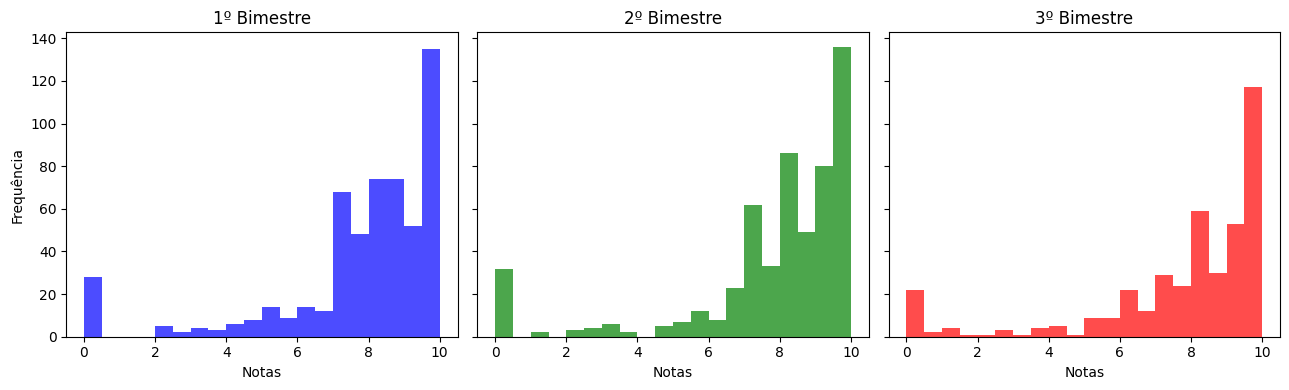

In [45]:
# Criar subplots
fig, axs = plt.subplots(1, 3, figsize=(13, 4), sharey=True)

# Histograma para a coluna 1º Bimestre
axs[0].hist(df['1º Bimestre'], bins=20, color='blue', alpha=0.7)
axs[0].set_title('1º Bimestre')
axs[0].set_xlabel('Notas')
axs[0].set_ylabel('Frequência')

# Histograma para a coluna 2º Bimestre
axs[1].hist(df['2º Bimestre'], bins=20, color='green', alpha=0.7)
axs[1].set_title('2º Bimestre')
axs[1].set_xlabel('Notas')

# Histograma para a coluna 3º Bimestre
axs[2].hist(df['3º Bimestre'], bins=20, color='red', alpha=0.7)
axs[2].set_title('3º Bimestre')
axs[2].set_xlabel('Notas')

# Ajustar layout
plt.tight_layout()

# Mostrar os gráficos
plt.show()

### Matriz de correlação de Pearson


In [46]:
# Calcular a matriz de correlação de Pearson
correlation_matrix = df[['1º Bimestre', '2º Bimestre', '3º Bimestre']].corr(method='pearson')

# Mostrar a matriz de correlação
print(correlation_matrix)

             1º Bimestre  2º Bimestre  3º Bimestre
1º Bimestre     1.000000     0.785143     0.783251
2º Bimestre     0.785143     1.000000     0.804359
3º Bimestre     0.783251     0.804359     1.000000


A diagonal principal sempre terá um coeficiente de correlação de 1, porque é a correlação de uma variável consigo mesma. Isso é esperado.

* **1º Bimestre vs. 2º Bimestre:** O coeficiente de 0.785143 indica uma correlação positiva forte (próxima de 1), sugerindo que as notas no 1º Bimestre e as notas no 2º Bimestre tendem a aumentar juntas.

* **1º Bimestre vs. 3º Bimestre:** O coeficiente de 0.783251 indica uma correlação positiva forte (próxima de 1), sugerindo que as notas no 1º Bimestre e as notas no 3º Bimestre (7.50) tendem a aumentar juntas.

* **2º Bimestre vs. 3º Bimestre:** O coeficiente de 0.804359 indica uma correlação positiva forte (próxima de 1), sugerindo que as notas no 2º Bimestre e as notas no 3º Bimestre tendem a aumentar juntas.

A matriz de correlação sugere que há correlações positivas fortes entre as notas nos diferentes bimestres, indicando que, em geral, as notas tendem a aumentar ou diminuir em conjunto entre os bimestres.

### Mapa de calor (heatmap)

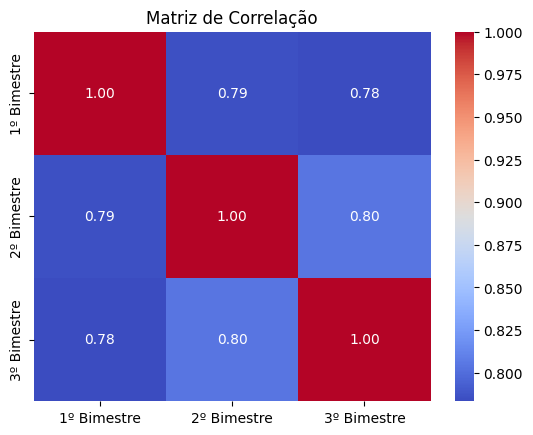

In [47]:
# Criar um mapa de calor (heatmap) para facilitar a visualização da correlação existente.
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

### Densidade de cada atribuito

<ipython-input-48-0e3687f91867>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label=col, shade=True)
<ipython-input-48-0e3687f91867>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label=col, shade=True)
<ipython-input-48-0e3687f91867>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label=col, shade=True)


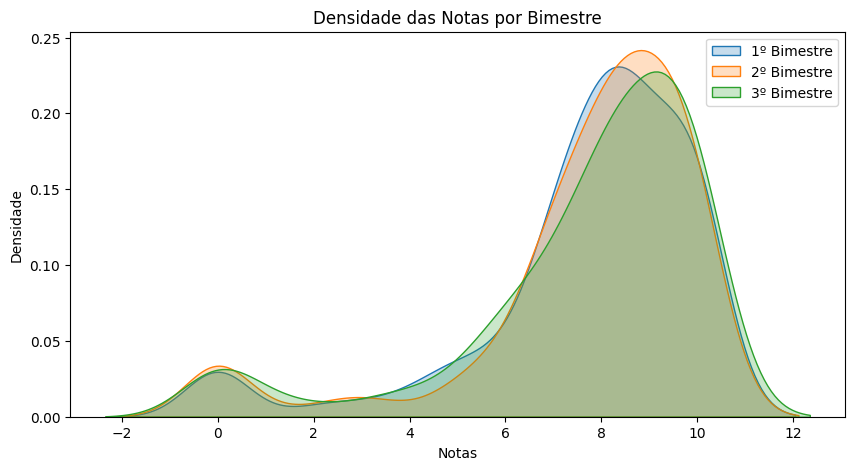

In [48]:
# Densidade de cada atribuito

# Configurar a figura
plt.figure(figsize=(10, 5))

# Criar gráficos de densidade para cada coluna
for col in df.columns:
    sns.kdeplot(df[col], label=col, shade=True)

# Adicionar título e rótulos aos eixos
plt.title('Densidade das Notas por Bimestre')
plt.xlabel('Notas')
plt.ylabel('Densidade')

# Mostrar a legenda
plt.legend()

# Mostrar o gráfico
plt.show()

* O eixo x representa as notas dos alunos, e o eixo y representa a densidade da distribuição dessas notas.
* Cada curva colorida representa a distribuição de densidade das notas para um bimestre específico.
* A área sob cada curva representa a probabilidade de uma nota ocorrer nesse bimestre.
* Se as curvas são mais largas, isso sugere uma maior variabilidade nas notas, enquanto curvas mais estreitas indicam menos variabilidade.

### Diagramas de dispersão

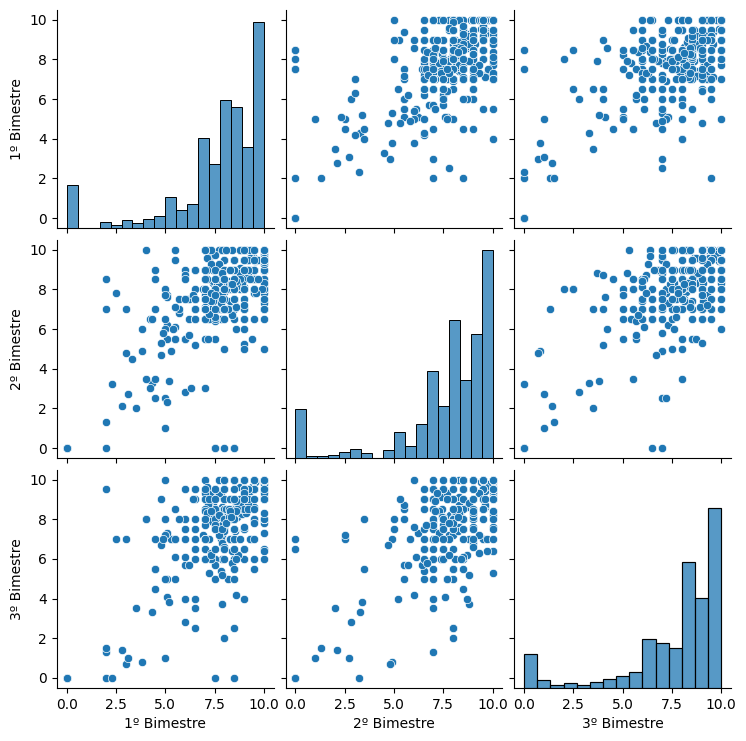

In [49]:
# Escolher as colunas para a matriz de diagramas de dispersão
columns = ['1º Bimestre', '2º Bimestre', '3º Bimestre']

# Criar matriz de diagramas de dispersão
sns.pairplot(df[columns])
plt.show()

### Boxplots

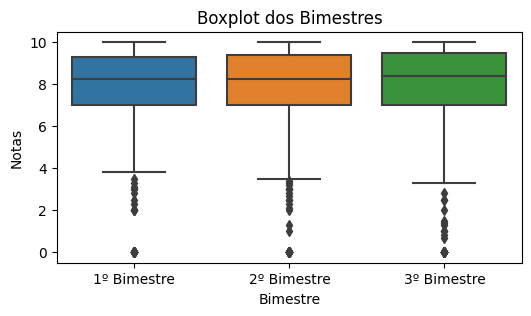

In [50]:
# Configurar a figura
plt.figure(figsize=(6, 3))

# Criar o boxplot
sns.boxplot(data=df)
plt.title('Boxplot dos Bimestres')
plt.xlabel('Bimestre')
plt.ylabel('Notas')

# Mostrar o gráfico
plt.show()

### Gráfico 3D

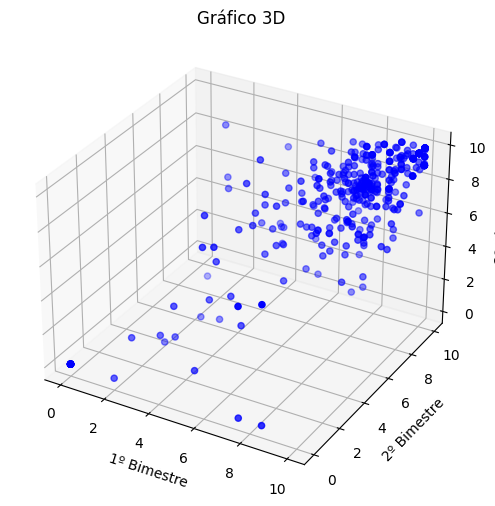

In [64]:
# Configurar a figura 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Criar o gráfico 3D
ax.scatter(df['1º Bimestre'], df['2º Bimestre'], df['3º Bimestre'], c='blue', marker='o')

# Adicionar rótulos aos eixos
ax.set_xlabel('1º Bimestre')
ax.set_ylabel('2º Bimestre')
ax.set_zlabel('3º Bimestre')

# Adicionar título
ax.set_title('Gráfico 3D')

# Mostrar o gráfico
plt.show()

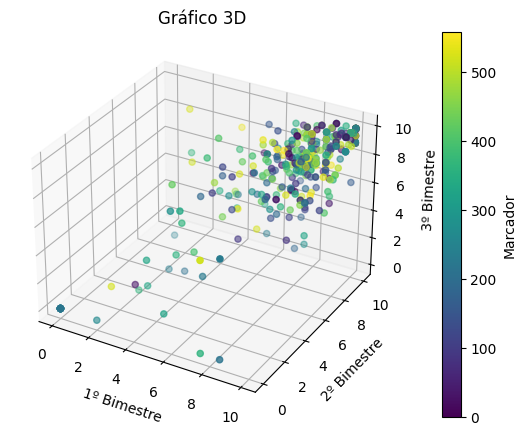

In [73]:

# Configurar a figura 3D
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111, projection='3d')

# Criar o gráfico 3D com cores diferentes para cada marcador
cores = np.arange(len(df))
sc = ax.scatter(df['1º Bimestre'], df['2º Bimestre'], df['3º Bimestre'], c=cores, cmap='viridis', marker='o')

# Adicionar rótulos aos eixos
ax.set_xlabel('1º Bimestre')
ax.set_ylabel('2º Bimestre')
ax.set_zlabel('3º Bimestre')

# Adicionar título
ax.set_title('Gráfico 3D')

# Adicionar barra de cores
cbar = fig.colorbar(sc, ax=ax, orientation='vertical', pad=0.05)
cbar.set_label('Marcador')

# Mostrar o gráfico
plt.show()

### Gráfico Swarm Plot

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 48.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 50.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 33.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 59.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 61.3% of the points cannot be plac

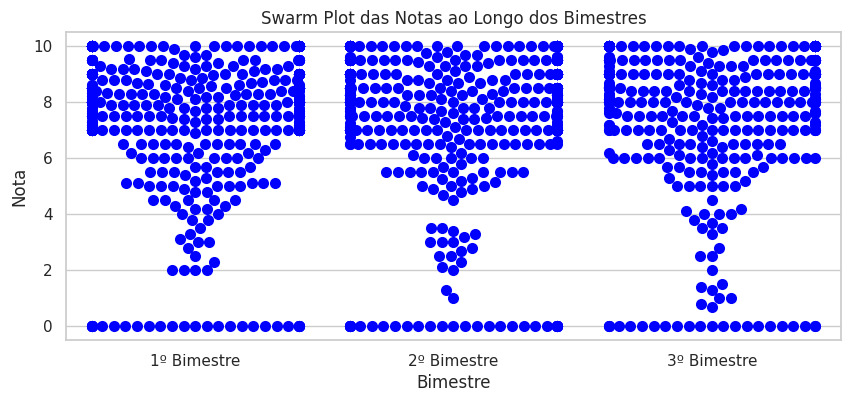

In [76]:
# Melt o DataFrame para o formato necessário para o swarm plot
df_melted = pd.melt(df, var_name='Bimestre', value_name='Nota')

# Configurar o estilo
sns.set(style="whitegrid")

# Criar o swarm plot
plt.figure(figsize=(10, 4))
sns.swarmplot(x='Bimestre', y='Nota', data=df_melted, color='blue', size=8)

# Adicionar título
plt.title('Swarm Plot das Notas ao Longo dos Bimestres')

# Mostrar o gráfico
plt.show()

Cada ponto representa a nota de um aluno em um determinado bimestre. A posição horizontal dos pontos indica o bimestre, e a posição vertical representa a nota do aluno.
Identificamos os padrões de concentração e dispersão das notas, a qual as maiores notas concetram-se acima da média 7 nos 3 bimestres o que representa um desempenho médio satisfatório e com baixa variação entre os bimestres.

### Gráfico de Radar/Spider

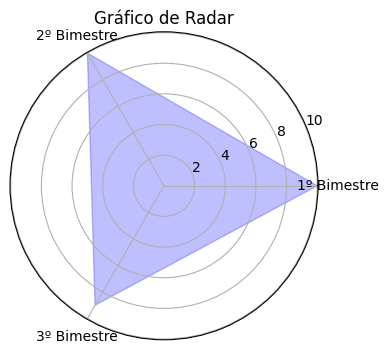

In [66]:
# Configurar o número de variáveis
num_variaveis = len(df.columns)

# Calcular os ângulos para cada variável
angulos = np.linspace(0, 2 * np.pi, num_variaveis, endpoint=False).tolist()

# Adicionar o primeiro valor no final para fechar o círculo
valores = df.iloc[0].tolist()
valores += valores[:1]
angulos += angulos[:1]

# Configurar a figura
fig, ax = plt.subplots(figsize=(4, 4), subplot_kw=dict(polar=True))

# Plotar o gráfico de radar
ax.fill(angulos, valores, color='blue', alpha=0.25)
ax.set_thetagrids(np.degrees(angulos[:-1]), df.columns)

# Adicionar título
ax.set_title('Gráfico de Radar')

# Mostrar o gráfico
plt.show()

* Cada nota é representado por um raio no gráfico de radar.
* A distância do centro para o ponto em cada raio representa o desempenho médio no bimestre.
* O gráfico mostra a tendência geral de desempenho nos bimestres.

# **5. Pré-processamento dos dados**

### Tratando dados faltantes

In [51]:
# Caso tenha dados faltantes, podemos tirar as linhas
#df = df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   1º Bimestre  556 non-null    float64
 1   2º Bimestre  550 non-null    float64
 2   3º Bimestre  408 non-null    float64
dtypes: float64(3)
memory usage: 13.2 KB


In [52]:
# Apresenta quantos dados faltantes
df.isna().sum()

1º Bimestre      3
2º Bimestre      9
3º Bimestre    151
dtype: int64

### Há dados duplicados?

In [53]:
# Retiramos dados duplicados em relação a todas as variáveis
# df.loc[df.duplicated()]

In [54]:
# Retiramos dados duplicados em relação a um conjunto específico de variáveis
# df.loc[df.duplicated(subset=['Ano letivo de 2023'])]

In [55]:
# Valores missing
# df.isnull().sum()

### Relação entre variáveis

* Diagramas de dispersão
* Mapas de calor (*heatmaps*)
* Agrupamento de dados: *groupby*(depois)

In [56]:
#
# Necessário retirar dados nulos do Data Frame
# plt.figure(figsize=(20,15))
# sns.heatmap(df.corr(numeric_only=True),cmap='BrBG',annot=True);

# **6. Tratamento dos dados**

### Matriz de distribuição dos missings do Data Frame

# **7. Descrição do MVP**

3.   **Análise de dados**
---
Estatísticas descritivas:
* Quantos atributos e instâncias existem?

* Quais são os tipos de dados dos atributos?

* Verifique as primeiras linhas do dataset. Algo chama a atenção?

* Há valores faltantes, discrepantes ou inconsistentes?

* Faça um resumo estatístico dos atributos com valor numérico (mínimo, máximo, mediana, moda, média, desvio-padrão e número de valores ausentes). O que você percebe?

---
Visualizações:

* Verifique a distribuição de cada atributo. O que você percebe? Dica: esta etapa pode dar ideias sobre a necessidade de transformações na etapa de preparação de dados (por exemplo, converter atributos de um tipo para outro, realizar operações de discretização, normalização, padronização, etc.).

* Se for um problema de classificação, verifique a distribuição de frequência das classes. O que você percebe? Dica: esta etapa pode indicar a possível necessidade futura de balanceamento de classes.

* Analise os atributos individualmente ou de forma combinada, usando os gráficos mais apropriados.

3. **Pré-processamento de dados**

* Verifique quais operações de pré-processamento podem ser interessantes para o seu problema e salve visões diferentes do seu dataset (por exemplo, normalização, padronização, discretização e one-hot-encoding).

* Trate (removendo ou substituindo) os valores faltantes (se existentes).
Realize outras transformações de dados porventura necessárias.

* Explique, passo a passo, as operações realizadas, justificando cada uma delas.

* Se julgar necessário, utilizando os dados pré-processados, volte na etapa de análise exploratória e verifique se surge algum insight diferente após as operações realizadas.